#Extra credit: Building LSTM for training

In this extra credit assignment, you will try to build your own LSTM network for application. The steps are following:
Loading the package and IMDB data.
Build the LSTM network base on description. In this step, you need to add codes to the LSTM building and validate your network. Please follow these steps in order, and add codes to build the model in the corresponding place.

In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
#Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)




## A challenge of LSTM in Keras

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

In [ ]:
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential

# build your LSTM model and train your model 
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

#choose your optimizer and loss function
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

#set the number of epochs and batch size
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 128s 203ms/step - loss: 0.4508 - acc: 0.7834 - val_loss: 0.4027 - val_acc: 0.8414
Epoch 2/5
625/625 [==============================] - 128s 205ms/step - loss: 0.2745 - acc: 0.8928 - val_loss: 0.2741 - val_acc: 0.8894
Epoch 3/5
625/625 [==============================] - 130s 208ms/step - loss: 0.2256 - acc: 0.9141 - val_loss: 0.2784 - val_acc: 0.8870
Epoch 4/5
625/625 [==============================] - 127s 204ms/step - loss: 0.1995 - acc: 0.9273 - val_loss: 0.2877 - val_acc: 0.8716
Epoch 5/5
625/625 [==============================] - 131s 210ms/step - loss: 0.1798 - acc: 0.9356 - val_loss: 0.3149 - val_acc: 0.8852


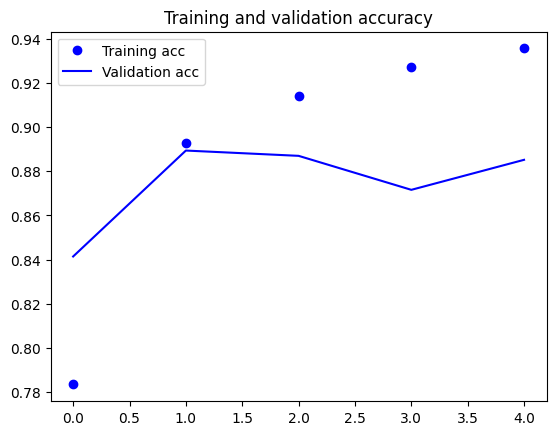

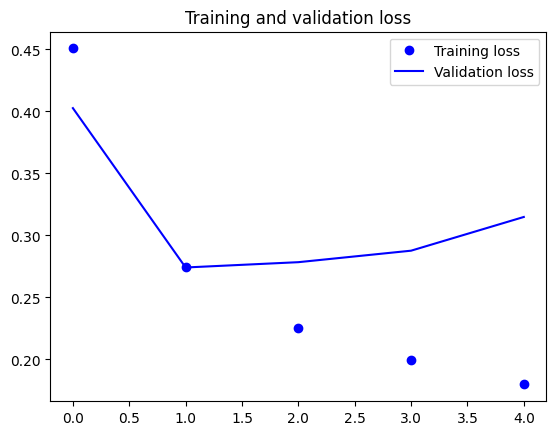

In [31]:
#print the accuracy and loss curves
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()